In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
files.upload()

Saving Country clusters.csv to Country clusters.csv


{'Country clusters.csv': b'Country,Latitude,Longitude,Language\r\nUSA,44.97,-103.77,English\r\nCanada,62.4,-96.8,English\r\nFrance,46.75,2.4,French\r\nUK,54.01,-2.53,English\r\nGermany,51.15,10.4,German\r\nAustralia,-25.45,133.11,English\r\n'}

In [ ]:
raw_data=pd.read_csv("Country clusters.csv")
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [ ]:
#Mapping
data=raw_data.copy()
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [ ]:
data["Language"]=data["Language"].map({"English":1,"French":0,"German":0})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,0
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,0
5,Australia,-25.45,133.11,1


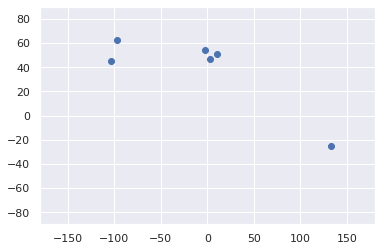

In [ ]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
x=data.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,0
3,54.01,-2.53,1
4,51.15,10.40,0
5,-25.45,133.11,1


# ***Clustering***

In [ ]:
kmeans_result=KMeans(3)
kmeans_result.fit(x)
kmeans_result

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters=kmeans_result.fit_predict(x)
identified_clusters

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [ ]:
data_with_clusters=data.copy()
data_with_clusters["Clusters"]=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,1,2
1,Canada,62.40,-96.80,1,2
2,France,46.75,2.40,0,1
3,UK,54.01,-2.53,1,1
4,Germany,51.15,10.40,0,1
5,Australia,-25.45,133.11,1,0


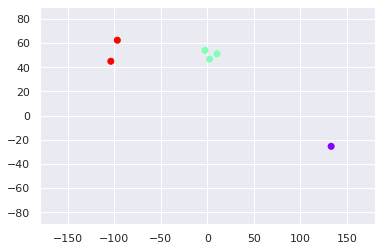

In [ ]:
plt.scatter(data_with_clusters["Longitude"],data_with_clusters["Latitude"],c=data_with_clusters["Clusters"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# ***WCSS***

**WCSS - WITH IN CLUSTER SUM OF SQUARES**

If no of observation is equal to no of clusters then wcss=0 because the observation becomes centroid and distance will be zero

If no of clusters is one then wcss=max

For all remaining scenarios wcss will lie between 0 and max


In [ ]:
#Prints WCSS Value
kmeans_result.inertia_

288.77189999999996

In [ ]:
#Calculating wcss for different no of clusters
wcss=[]
for i in range(1,7):
  kmeans_result=KMeans(i)
  kmeans_result.fit(x)
  wcss_iter=kmeans_result.inertia_
  wcss.append(wcss_iter)
wcss

[42603.2469,
 13206.958119999998,
 288.77189999999996,
 112.579,
 39.00624999999998,
 0.0]

In [ ]:
number_of_cluster=range(1,7)

Text(0.5, 1.0, 'Elbow Method')

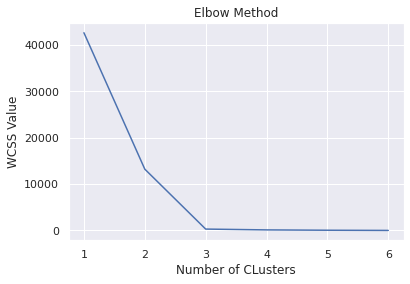

In [ ]:
plt.plot(number_of_cluster,wcss)
plt.xlabel("Number of CLusters")
plt.ylabel("WCSS Value")
plt.title("Elbow Method")

In the two bends available the bend at which the WCSS value is minimum , the no of cluster at that point is considered on best(Advisable) no of clusters to do K-Means

In [ ]:
files.upload()

Saving Country clusters standardized.csv to Country clusters standardized.csv


{'Country clusters standardized.csv': b'\xef\xbb\xbfCountry,Latitude,Longitude,Language\r\nUSA,0.186539588,-1.089159514,0\r\nCanada,0.728587658,-1.008603741,0\r\nFrance,0.241895042,0.137900235,1\r\nUK,0.467670658,0.080921761,0\r\nGermany,0.378728749,0.230360233,2\r\nAustralia,-2.003421694,1.648581027,0\r\n'}

In [ ]:
data1=pd.read_csv("Country clusters standardized.csv",index_col="Country")
data1

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [ ]:
x_scaled=data1.copy()
x_scaled=x_scaled.drop(["Language"],axis=1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


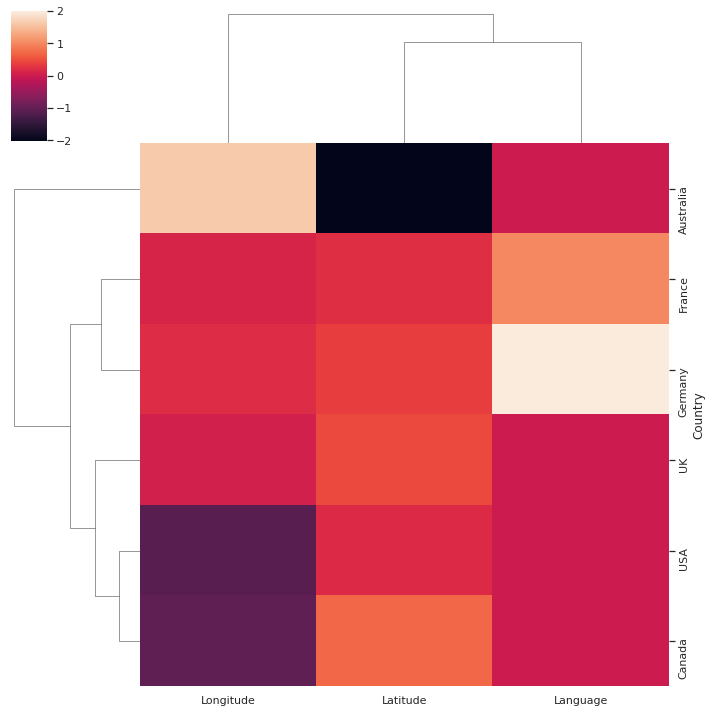

In [ ]:
#Dendogram of Data
sns.clustermap(data1)